## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape , output_neurons = 10 , neurons = [256 , 256 , 256 , 128]):
    """Code Here
    建立你的神經網路
    """
    inputs = keras.layers.Input(shape = input_shape)

    for i , neuron in enumerate(neurons):
      if i ==0:
        x = keras.layers.Dense(units = neuron , activation = 'relu')(inputs)
        x = keras.layers.BatchNormalization()(x)
      else:
        x = keras.layers.Dense(units = neuron , activation = 'relu')(x)
        x = keras.layers.BatchNormalization()(x)
    outputs = keras.layers.Dense(units = output_neurons , activation = 'softmax')(x)

    model = keras.models.Model(inputs = [inputs] , outputs = [outputs])
    return model

In [6]:
"""Code Here
設定超參數
"""
batches = [128 , 256]
epoch = 20

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch in batches:
  keras.backend.clear_session()
  model = build_mlp(x_train.shape[1:])
  model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['acc'])
  model.fit(x_train , y_train , epochs = epoch , batch_size = batch , validation_data = (x_test , y_test) , shuffle = True)

  # Collect results
  train_loss = model.history.history["loss"]
  valid_loss = model.history.history["val_loss"]
  train_acc = model.history.history["acc"]
  valid_acc = model.history.history["val_acc"]
  
  exp_name_tag = "exp-batch-%s" % str(batch)
  results[exp_name_tag] = {'train-loss': train_loss,
                           'valid-loss': valid_loss,
                           'train-acc': train_acc,
                           'valid-acc': valid_acc}


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s 111us/step - loss: 1.7062 - acc: 0.3932 - val_loss: 1.8322 - val_acc: 0.3590
Epoch 2/20
50000/50000 [==============================] - 4s 87us/step - loss: 1.4712 - acc: 0.4746 - val_loss: 1.8629 - val_acc: 0.3584
Epoch 3/20
50000/50000 [==============================] - 5s 92us/step - loss: 1.3701 - acc: 0.5103 - val_loss: 1.6762 - val_acc: 0.4087
Epoch 4/20
50000/50000 [==============================] - 5s 95us/step - loss: 1.3128 - acc: 0.5327 - val_loss: 1.5758 - val_acc: 0.4396
Epoch 5/20
50000/50000 [==============================] - 5s 104us/step - loss: 1.2447 - acc: 0.5564 - val_loss: 1.6470 - val_acc: 0.4293
Epoch 6/20
50000/50000 [==============================] - 5s 94us/step - loss: 1.1980 - acc: 0.5742 - val_loss: 1.5473 - val_acc: 0.4490
Epoch 7/20
50000/50000 [==============================] - 5s 91us/step - loss: 1.1466 - acc: 0.5932 - val_loss: 1.4817 - val_a

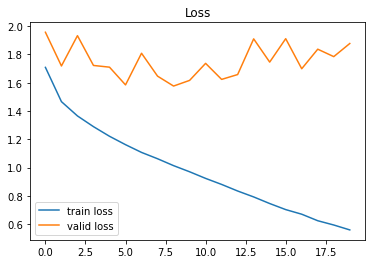

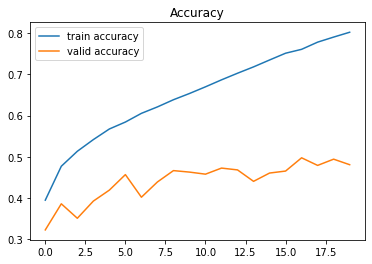

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()